In [97]:
import numpy as np
import pylab as plt
import networkx as nx

In [98]:
# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]
points_list

[(0, 1), (1, 5), (5, 6), (5, 4), (1, 2), (2, 3), (2, 7)]

In [99]:
goal =7

In [100]:
G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)

{0: Text(-0.536677,0.0300384,u'0'),
 1: Text(-0.10075,0.00571434,u'1'),
 2: Text(0.0794604,0.575422,u'2'),
 3: Text(0.445756,0.83551,u'3'),
 4: Text(0.348393,-0.881287,u'4'),
 5: Text(0.0142149,-0.57981,u'5'),
 6: Text(-0.181492,-0.985588,u'6'),
 7: Text(-0.0689063,1,u'7')}

## This shows the graph and how it's connected

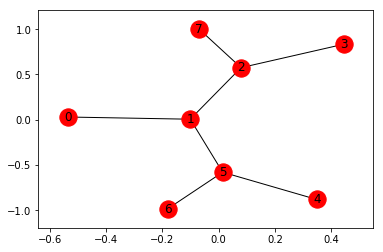

In [101]:
plt.show() 

In [102]:
# we have 8 total points
MATRIX_SIZE = 8

#create the Rewards Graph=matrix version of the points on graph

# we create a matrix of 8x8 filled with ones
R = np.matrix(np.ones(shape=(MATRIX_SIZE,MATRIX_SIZE)))
R

matrix([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [103]:
#multiply the matrix by -1 as initialization
R *= -1
R

matrix([[-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.]])

### Change values to 0 if it is viable and 100 if it is a goal path

indexing matrices and arrays in numpy link: https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html

In [104]:
for point in points_list:
    print point #printing out the points to see each point as it goes through
    if point[1] == goal:
        print point[1], 'is the goal!'
        R[point] = 100 #point= (2,7) = for this case row 2 column 7 would be assigned a 100
    else:
        R[point] = 0 #else (0,1), (1,5)... are turned to 0's
    
    if point[0] == goal:
        print point[0], 'is the goal'
        R[point[::-1]] = 100 #this will select the row and column from point and select 
    else:
        #this time the point is reversed
        R[point[::-1]] = 0
R

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)
7 is the goal!


matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.]])

In [105]:
#now we add the goal point in order to create a round trip which is 7,7
R[goal,goal]=100
R

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

To read the above matrix, the **y-axis** is the state or where your bot is **currently located**, and the **x-axis** is your **possible next actions**. We then build our Q-learning matrix which will hold all the lessons learned from our bot. The Q-learning model uses a transitional rule formula and **gamma** is the learning parameter.

In [106]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE])) 
Q

matrix([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [107]:
#learning parameter
gamma = 0.8 #not sure what a good value would be but maybe something we can research as well
initial_state = 1

### Find available actions to take

In [108]:
def available_actions(state):
    current_state_row = R[state,] #for initial state it is row 1 from R matrix
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 
available_act

array([0, 2, 5])

In [34]:
something = R[1,]
something

matrix([[ 0., -1.,  0., -1., -1.,  0., -1., -1.]])

In [33]:
np.where(something>=0)

(array([0, 0, 0]), array([0, 2, 5]))

In [35]:
np.where(something>=0)[1] #this grabs the second array

array([0, 2, 5])

### We need to sample the next actions to take which will be taken at random
in our case between 0,2,5
sources on np random choice: https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.choice.html

In [109]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,size=1)) #picks one of the availabel actions at random
    return next_action

action = sample_next_action(available_act)
action

5

In [110]:
def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1] #an array of where the row matches the max value of in same row
    
    if max_index.shape[0]>1: #if the lenght of the array is greater than 1
        max_index = int(np.random.choice(max_index,1))#we only want one value
    else:
        max_index = int(max_index) #if its only of size 1 then use the same number
    
    max_value = Q[action,max_index] #the maximum value will be the action chosen as the row and the max index ans the column
    
    Q[current_state, action] = R[current_state,action] + gamma * max_value
    #print 'Q[current_state, action]:', Q[current_state, action]
    #print 'R[current_state,action]:',R[current_state,action]
    #print 'max_value:', max_value
    #print 'value added:',R[current_state,action] + gamma * max_value
    #print 'np.max(Q)',np.max(Q)
    
    if (np.max(Q)>0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)   

In [111]:
update(initial_state, action, gamma) #need to run this to start with initial state 1

0

In [62]:
testing = np.where(Q[action,] == np.max(Q[action,]))[1]
testing

array([0, 1, 2, 3, 4, 5, 6, 7])

In [63]:
testing.shape[0]

8

### Training Phase

In [112]:
scores =[]
for i in xrange(0,7000):
    current_state = np.random.randint(0,int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state, action, gamma)
    scores.append(score)
    #print 'score:', str(score)

In [113]:
print 'Trained Q Matrix:'
print Q/np.max(Q)*100

Trained Q Matrix:
[[  0.    64.     0.     0.     0.     0.     0.     0.  ]
 [ 51.2    0.    80.     0.     0.    51.2    0.     0.  ]
 [  0.    64.     0.    64.     0.     0.     0.   100.  ]
 [  0.     0.    80.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.    51.2    0.     0.  ]
 [  0.    64.     0.     0.    40.96   0.    40.96   0.  ]
 [  0.     0.     0.     0.     0.    51.2    0.     0.  ]
 [  0.     0.    80.     0.     0.     0.     0.   100.  ]]


### Testing Phase

In [114]:
current_state = 0 #start at 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)


Most efficient path:
[0, 1, 2, 7]


### Graph of how it converges to most efficient path

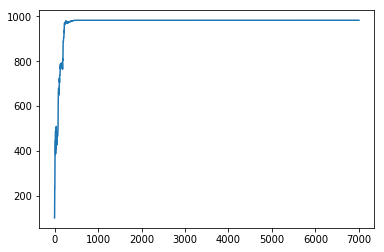

In [115]:
plt.plot(scores)
plt.show()